In [1]:
import sys
sys.path.append("./ters_gen/")

In [2]:
pwd

'/home/sethih1/masque_new/composnet/ters_gen'

In [3]:
from src.datasets import Ters_dataset_filtered_skip
from src.metrics import Metrics
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

import os
from collections import defaultdict

from src.transforms import Normalize, MinimumToZero

import torchvision.transforms as transforms

# ——— Dataset & model setup ———
suffix = 'atif'
data_path = f"/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/{suffix}/"
data_path = '/home/sethih1/masque_new/masque/check/'
#data_path = "/scratch/phys/sin/sethih1/data_files/plane_third_group_images_nr_256_new/"

num_channels = 100
sg_ch = False

data_transform = transforms.Compose([Normalize(), MinimumToZero()])

ters_set = Ters_dataset_filtered_skip(
    filename=data_path,
    frequency_range=[0, 4000],
    num_channels=num_channels,
    std_deviation_multiplier=2,
    sg_ch=sg_ch,
    t_image=data_transform,
    t_freq=None, 
    flag=True
)

ters_loader = DataLoader(ters_set, batch_size=32, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(
    '/scratch/phys/sin/sethih1/models/composnet/all_group_plane_fchk_split_images_ters/hyperopt/config3/seg_bs_16_lr_0.00015629566600182425_loss_dice_loss.pt',
    #'/scratch/phys/sin/sethih1/models/all_group_plane_fchk_split_images/hyperopt/config2/seg_bs_16_lr_0.00024002900476800525_loss_dice_loss.pt',
    #'/scratch/phys/sin/sethih1/models/planar_256/config7/seg_bs_32_lr_0.0001_loss_dice_loss.pt',
    map_location=device
)
model.eval()



/tmp/ipykernel_2093586/3808092868.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(


AttentionUNet(
  (conv): Conv2d(100, 64, kernel_size=(1, 1), stride=(1, 1))
  (encoder): ModuleList(
    (0): ResBlock(
      (res): Sequential(
        (0): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
      (skip): Sequential(
        (0): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResBlock(
      (res): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [4]:
# ——— Collect IoUs, Dice coefficients, images, masks & preds ———
ious = []
dice_coeffs = []
images_list = []
masks_list = []
preds_list = []
filename_list = []


for filename, _, _, images, _, masks in tqdm(ters_loader, desc="Eval Metrics"):
   

    masks  = masks.to(device)

    print(masks.size(0))
    for i in range(masks.size(0)):
        mask_i = masks[i]
    
        #images_list.append(images[i].cpu())
        masks_list.append(mask_i.cpu().squeeze(0).numpy())
            
        


#

Eval Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Eval Metrics: 100%|██████████| 1/1 [03:55<00:00, 235.87s/it]

1


In [5]:
len(masks_list)

1

In [6]:
mask = masks_list[0]

In [7]:
mask.shape

(5, 256, 256)

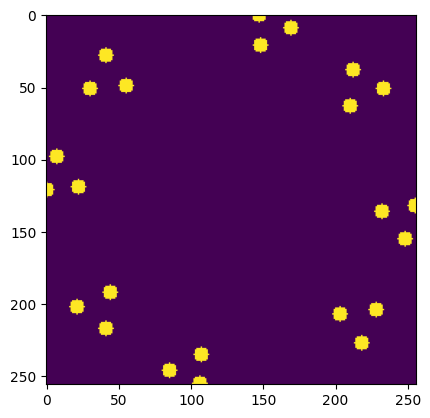

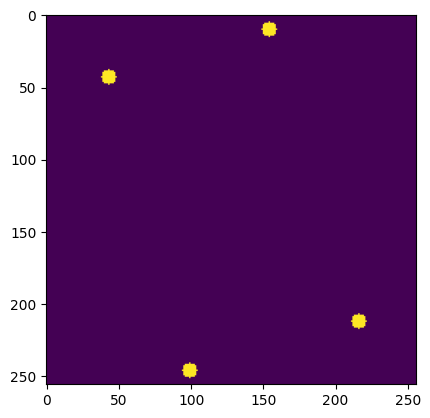

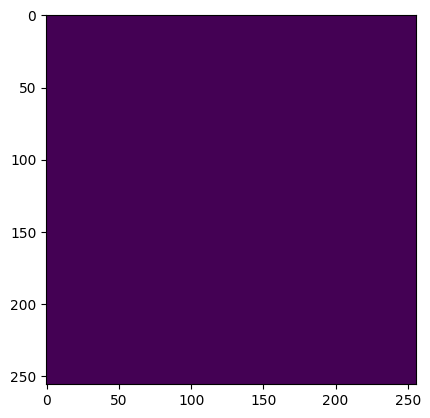

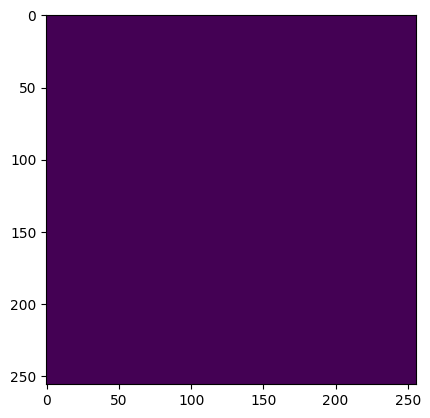

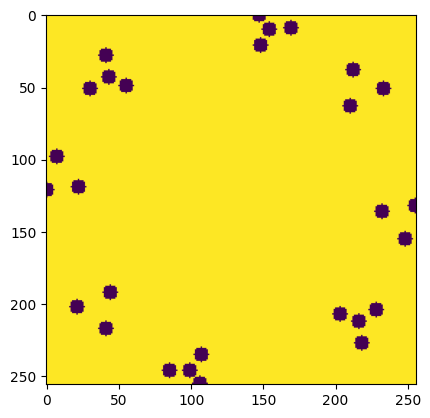

In [8]:
for i in range(mask.shape[0]):
    plt.figure()
    plt.imshow(mask[i])
    

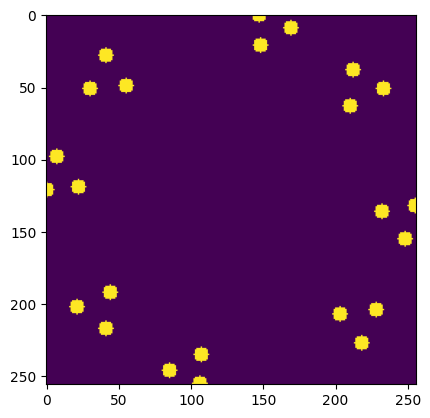

In [9]:
plt.imshow(mask[0].astype(int))

In [13]:
%matplotlib inline

In [10]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Sample image
data = mask[0]
plt.figure()
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='viridis')

# Enable interactive cursor
cursor = mplcursors.cursor(im, hover=True)

@cursor.connect("add")
def on_add(sel):
    x, y = int(sel.target[0]), int(sel.target[1])
    val = data[y, x]
    sel.annotation.set_text(f"({x}, {y}) = {val:.3f}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

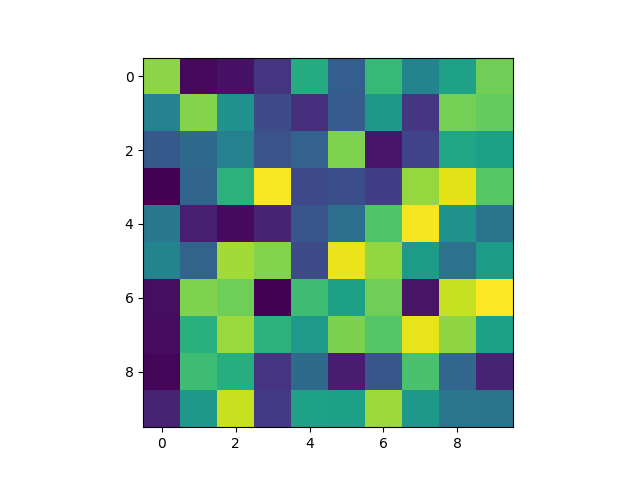

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# Create sample data
data = np.random.rand(10, 10)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='viridis')

# Add interactive cursor
cursor = mplcursors.cursor(im, hover=True)

@cursor.connect("add")
def on_add(sel):
    x, y = int(sel.target[0]), int(sel.target[1])
    val = data[y, x]
    sel.annotation.set_text(f"({x}, {y}) = {val:.3f}")


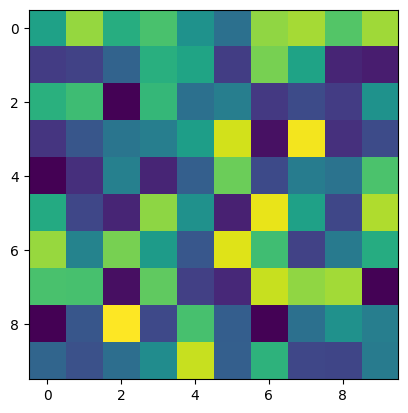

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

data = np.random.rand(10, 10)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='viridis')

cursor = mplcursors.cursor(im, hover=True)

@cursor.connect("add")
def on_add(sel):
    x, y = int(sel.target[0]), int(sel.target[1])
    val = data[y, x]
    sel.annotation.set_text(f"({x}, {y}) = {val:.3f}")

plt.show()


In [ ]:
plt.imshow(mask[0].astype(int))

<IPython.core.display.Javascript object>